# Kerr spacetime in 3+1 Kerr coordinates

In [1]:
%display latex

In [2]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


In [3]:
X.<t,r,th,ph> = M.chart(r't r th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
X.coord_range()

t: (-oo, +oo); r: (-oo, +oo); th: (0, pi); ph: (0, 2*pi)

In [5]:
m = var('m', domain='real')
assume(m>0)
a = var('a', domain='real')
assume(a>=0)

In [6]:
g = M.lorentzian_metric('g')
rho2 = r^2 + (a*cos(th))^2
g[0,0] = -(1 - 2*m*r/rho2)
g[0,1] = 2*m*r/rho2
g[0,3] = -2*a*m*r*sin(th)^2/rho2
g[1,1] = 1 + 2*m*r/rho2
g[1,3] = -a*(1 + 2*m*r/rho2)*sin(th)^2
g[2,2] = rho2
g[3,3] = (r^2+a^2+2*m*r*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

g = -(a^2*cos(th)^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) dt*dt + 2*m*r/(a^2*cos(th)^2 + r^2) dt*dr - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + 2*m*r/(a^2*cos(th)^2 + r^2) dr*dt + (a^2*cos(th)^2 + 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) dr*dr - (a^3*cos(th)^2 + 2*a*m*r + a*r^2)*sin(th)^2/(a^2*cos(th)^2 + r^2) dr*dph + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt - (a^3*cos(th)^2 + 2*a*m*r + a*r^2)*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dr + (2*a^2*m*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

In [7]:
g.display_comp()

g_t,t = -(a^2*cos(th)^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) 
g_t,r = 2*m*r/(a^2*cos(th)^2 + r^2) 
g_t,ph = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_r,t = 2*m*r/(a^2*cos(th)^2 + r^2) 
g_r,r = (a^2*cos(th)^2 + 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) 
g_r,ph = -(a^3*cos(th)^2 + 2*a*m*r + a*r^2)*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_th,th = a^2*cos(th)^2 + r^2 
g_ph,t = -2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_ph,r = -(a^3*cos(th)^2 + 2*a*m*r + a*r^2)*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_ph,ph = (2*a^2*m*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2)

In [8]:
g.inverse()[:]

[-(a^2*cos(th)^2 + 2*m*r + r^2)/(a^2*cos(th)^2 + r^2)                          2*m*r/(a^2*cos(th)^2 + r^2)                                                    0                                                    0]
[                         2*m*r/(a^2*cos(th)^2 + r^2)            (a^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2)                                                    0                              a/(a^2*cos(th)^2 + r^2)]
[                                                   0                                                    0                              1/(a^2*cos(th)^2 + r^2)                                                    0]
[                                                   0                              a/(a^2*cos(th)^2 + r^2)                                                    0           -1/(a^2*sin(th)^4 - (a^2 + r^2)*sin(th)^2)]

In [9]:
g.determinant().display()

M --> R
(t, r, th, ph) |--> a^4*cos(th)^6 - (a^4 - 2*a^2*r^2)*cos(th)^4 - r^4 - (2*a^2*r^2 - r^4)*cos(th)^2

In [10]:
g.determinant() == - (rho2*sin(th))^2

True

In [11]:
# Ric = g.ricci()
# Ric.display()

In [12]:
g.christoffel_symbols_display()

Gam^t_t,t = -2*(a^2*m^2*r*cos(th)^2 - m^2*r^3)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^t_t,r = -(a^4*m*cos(th)^4 + 2*a^2*m^2*r*cos(th)^2 - 2*m^2*r^3 - m*r^4)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^t_t,th = -2*a^2*m*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_t,ph = 2*(a^3*m^2*r*cos(th)^2 - a*m^2*r^3)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^t_r,r = -2*(a^4*m*cos(th)^4 + a^2*m^2*r*cos(th)^2 - m^2*r^3 - m*r^4)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^t_r,th = -2*a^2*m*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_r,ph = (a^5*m*cos(th)^4 + 2*a^3*m^2*r*cos(th)^2 - 2*a*m^2*r^3 - a*m*r^4)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^t_th,th = -2*m*r^2/(a^2*cos(th)^2 + r^2) 
Gam^t_th,ph = 2*a^3*m*r*cos(th)*sin(th)^3/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_ph,ph = -2*((a^4*m^2*r*cos(th)^2 - a^2*m^2*r^3)*sin(th)^4 + (a^4*m*r^2*cos(th)^4 + 2*a^2*m*r^4*cos(th)^2 + m*r^6)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,t = (a^2*m*r^2 - 2*m^2*r^3 + m*r^4 - (a^4*m - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,r = (2*a^2*m^2*r*cos(th)^2 - 2*m^2*r^3 - (a^4*m*cos(th)^2 - a^2*m*r^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,ph = -(a^3*m*r^2 - 2*a*m^2*r^3 + a*m*r^4 - (a^5*m - 2*a^3*m^2*r + a^3*m*r^2)*cos(th)^2)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_r,r = (2*a^4*m*cos(th)^4 + a^2*m*r^2 - 2*m^2*r^3 - m*r^4 - (a^4*m - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_r,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^r_r,ph = ((a^5*m*cos(th)^2 - a^3*m*r^2)*sin(th)^4 + (a^5*r*cos(th)^4 + 2*a*m^2*r^3 + a*r^5 - 2*(a^3*m^2*r - a^3*r^3)*cos(th)^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_th,th = -(a^2*r - 2*m*r^2 + r^3)/(a^2*cos(th)^2 + r^2) 
Gam^r_ph,ph = ((a^4*m*r^2 - 2*a^2*m^2*r^3 + a^2*m*r^4 - (a^6*m - 2*a^4*m^2*r + a^4*m*r^2)*cos(th)^2)*sin(th)^4 - (a^2*r^5 - 2*m*r^6 + r^7 + (a^6*r - 2*a^4*m*r^2 + a^4*r^3)*cos(th)^4 + 2*(a^4*r^3 - 2*a^2*m*r^4 + a^2*r^5)*cos(th)^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,t = -2*a^2*m*r*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,r = -2*a^2*m*r*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,ph = 2*(a^3*m*r + a*m*r^3)*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_r,r = -2*a^2*m*r*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_r,th = r/(a^2*cos(th)^2 + r^2) 
Gam^th_r,ph = (a^5*cos(th)^5 + 2*a^3*r^2*cos(th)^3 + (2*a^3*m*r + 2*a*m*r^3 + a*r^4)*cos(th))*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_th,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^th_ph,ph = -((a^6 - 2*a^4*m*r + a^4*r^2)*cos(th)^5 + 2*(a^4*r^2 - 2*a^2*m*r^3 + a^2*r^4)*cos(th)^3 + (2*a^4*m*r + 4*a^2*m*r^3 + a^2*r^4 + r^6)*cos(th))*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,t = -(a^3*m*cos(th)^2 - a*m*r^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,r = -(a^3*m*cos(th)^2 - a*m*r^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,th = -2*a*m*r*cos(th)/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th)) 
Gam^ph_t,ph = (a^4*m*cos(th)^2 - a^2*m*r^2)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_r,r = -(a^3*m*cos(th)^2 - a*m*r^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_r,th = -(a^3*cos(th)^3 + (2*a*m*r + a*r^

In [13]:
dr = X.coframe()[1]
print(dr)
dr.display()

1-form dr on the 4-dimensional differentiable manifold M


dr = dr

In [14]:
nr = dr.up(g)
print(nr)
nr.display()

Vector field on the 4-dimensional differentiable manifold M


2*m*r/(a^2*cos(th)^2 + r^2) d/dt + (a^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) d/dr + a/(a^2*cos(th)^2 + r^2) d/dph

In [15]:
assume(a^2<m^2)
rp = m + sqrt(m^2-a^2)
rp

m + sqrt(-a^2 + m^2)

In [16]:
p = M.point(coords=(t,rp,th,ph), name='p')
print(p)

Point p on the 4-dimensional differentiable manifold M


In [17]:
X(p)

(t, m + sqrt(-a^2 + m^2), th, ph)

In [18]:
nrH = nr.at(p)
print(nrH)

Tangent vector at Point p on the 4-dimensional differentiable manifold M


In [19]:
Tp = M.tangent_space(p)
print(Tp)

Tangent space at Point p on the 4-dimensional differentiable manifold M


In [20]:
Tp.default_basis()

Basis (d/dt,d/dr,d/dth,d/dph) on the Tangent space at Point p on the 4-dimensional differentiable manifold M

In [21]:
nrH[:]

[-2*(sqrt(a + m)*sqrt(-a + m)*m + m^2)/(a^2*sin(th)^2 - 2*sqrt(a + m)*sqrt(-a + m)*m - 2*m^2),
 0,
 0,
 -a/(a^2*sin(th)^2 - 2*sqrt(a + m)*sqrt(-a + m)*m - 2*m^2)]

In [22]:
OmegaH = a/(2*m*rp)
OmegaH

1/2*a/((m + sqrt(-a^2 + m^2))*m)

In [23]:
xi = X.frame()[0]
xi

Vector field d/dt on the 4-dimensional differentiable manifold M

In [24]:
eta = X.frame()[3]
eta

Vector field d/dph on the 4-dimensional differentiable manifold M

In [25]:
chi = xi + OmegaH*eta
chi.display()

d/dt + 1/2*a/(sqrt(a + m)*sqrt(-a + m)*m + m^2) d/dph

## Ingoing principal null geodesics

In [26]:
k = M.vector_field(name='k')
k[0] = 1
k[1] = -1
k.display()

k = d/dt - d/dr

In [27]:
g(k,k).display()

g(k,k): M --> R
   (t, r, th, ph) |--> 0

In [28]:
nab = g.connection()
acc = nab(k).contract(k)
acc.display()

0

In [29]:
nab(k).display()

nabla_g(k) = (a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dt*dt + (a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dt*dr - (a^3*m*cos(th)^2 - a*m*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dt*dph - (a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dr*dt - (a^2*m*cos(th)^2 - m*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dr*dr + a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) d/dr*dth - ((a^3*m - a^3*r)*sin(th)^4 - (a^3*m - a^3*r - a*m*r^2 - a*r^3)*sin(th)^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) d/dr*dph - r/(a^2*cos(th)^2 + r^2) d/dth*dth - a*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) d/dth*dph + a*cos(th)/((a^2*cos(th)^2 + r^2)*sin(th)) d/dph*dth - r/(a^2*cos(th)^2 + r^2) d/dph*dph

## Outgoing principal null geodesics

In [30]:
el = M.vector_field(name='el', latex_name=r'\ell')
el[0] = 1/2 + m*r/(r^2+a^2)
el[1] = 1/2 - m*r/(r^2+a^2)
el[3] = a/(r^2+a^2)
el.display()

el = 1/2*(a^2 + 2*m*r + r^2)/(a^2 + r^2) d/dt + 1/2*(a^2 - 2*m*r + r^2)/(a^2 + r^2) d/dr + a/(a^2 + r^2) d/dph

In [31]:
g(el,el).display()

g(el,el): M --> R
   (t, r, th, ph) |--> 0

In [32]:
acc = nab(el).contract(el)
acc.display()

-1/2*(a^4*m + 2*a^2*m^2*r - 2*m^2*r^3 - m*r^4)/(a^6 + 3*a^4*r^2 + 3*a^2*r^4 + r^6) d/dt - 1/2*(a^4*m - 2*a^2*m^2*r + 2*m^2*r^3 - m*r^4)/(a^6 + 3*a^4*r^2 + 3*a^2*r^4 + r^6) d/dr - (a^3*m - a*m*r^2)/(a^6 + 3*a^4*r^2 + 3*a^2*r^4 + r^6) d/dph

In [33]:
for i in [0,1,3]:
    pretty_print(acc[i] / el[i])

-(a^2*m - m*r^2)/(a^4 + 2*a^2*r^2 + r^4)

-(a^2*m - m*r^2)/(a^4 + 2*a^2*r^2 + r^4)

-(a^2*m - m*r^2)/(a^4 + 2*a^2*r^2 + r^4)

In [34]:
kappa = (acc[0] / el[0]).expr()
kappa

-(a^2*m - m*r^2)/(a^4 + 2*a^2*r^2 + r^4)

In [35]:
acc == kappa * el

True

In [36]:
assume(1-a^2>0)
f(r,a) = integrate((r^2+a^2 + 2*r)/(r^2+a^2-2*r), r)
f(r,a)

r + 2*log((r - sqrt(-a^2 + 1) - 1)/(r + sqrt(-a^2 + 1) - 1))/sqrt(-a^2 + 1) + 2*log(a^2 + r^2 - 2*r)

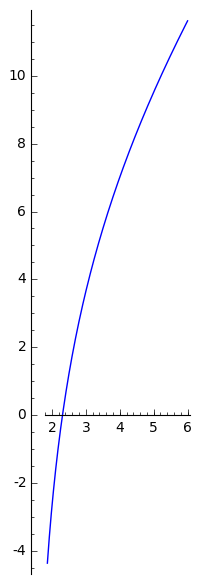

In [37]:
rH(a) = 1 + sqrt(1-a^2)
plot(f(r,0.9), (r, 1.3*rH(0.9), 6), aspect_ratio=1)

In [38]:
el = M.vector_field(name='el', latex_name=r'\ell')
el[0] = r^2+a^2 + 2*m*r
el[1] = r^2+a^2 - 2*m*r
el[3] = 2*a
el.display()

el = (a^2 + 2*m*r + r^2) d/dt + (a^2 - 2*m*r + r^2) d/dr + 2*a d/dph

In [39]:
g(el,el).display()

g(el,el): M --> R
   (t, r, th, ph) |--> 0

In [40]:
acc = nab(el).contract(el)
acc.display()

(-2*a^2*m + 2*m*r^2 + 2*r^3 + 2*(a^2 - 2*m^2)*r) d/dt + (-2*a^2*m - 6*m*r^2 + 2*r^3 + 2*(a^2 + 2*m^2)*r) d/dr + (-4*a*m + 4*a*r) d/dph

In [41]:
for i in [0,1,3]:
    pretty_print(acc[i] / el[i])

-2*m + 2*r

-2*m + 2*r

-2*m + 2*r

In [42]:
kappa = (acc[0] / el[0]).expr()
kappa

-2*m + 2*r

In [43]:
acc == kappa * el

True